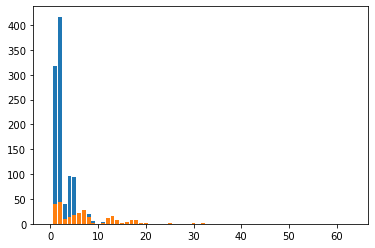

0.30749455337690634


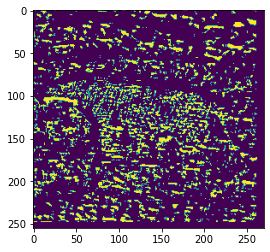

In [2]:
from scipy.io import loadmat
import scipy.fftpack
from matplotlib import pyplot as plt, image
import numpy as np
from matplotlib.pyplot import imread
import cv2


trainingData = loadmat('TrainingSamplesDCT_8.mat')

TrainSampleDCT_FG = trainingData['TrainsampleDCT_FG']
TrainSampleDCT_BG = trainingData['TrainsampleDCT_BG']

BG_prior = len(TrainSampleDCT_BG)/(len(TrainSampleDCT_BG) + len(TrainSampleDCT_FG))
FG_prior = len(TrainSampleDCT_FG)/(len(TrainSampleDCT_BG) + len(TrainSampleDCT_FG))

BGX = np.zeros(64)
FGX = np.zeros(64)

for coffs in TrainSampleDCT_BG:
    x = coffs.argsort()[-2]
    BGX[x] += 1

for coffs in TrainSampleDCT_FG:
    x = coffs.argsort()[-2]
    FGX[x] += 1

plt.bar(range(64),BGX)
plt.bar(range(64),FGX)



plt.show()

BGX = BGX/len(TrainSampleDCT_BG)
FGX = FGX/len(TrainSampleDCT_FG)

img = image.imread("cheetah.bmp")/255
rgb_weights = [0.2989, 0.5870, 0.1140]

img = np.dot(img[...,:3], rgb_weights)/255

x_size,y_size = img.shape

zigzag = np.loadtxt("Zig-Zag Pattern.txt",dtype='i')
def dct2(a):
    return scipy.fftpack.dct( scipy.fftpack.dct( a, axis=0, norm='ortho' ), axis=1, norm='ortho' )

result = np.zeros(img.shape)

for i in range(x_size-7):
    for j in range(y_size-7):
        dct= np.array(dct2(img[i:(i+8),j:(j+8)]))
        dct = dct.flatten()
        x = dct.argsort()[-2]
        if BGX[x]*BG_prior < FGX[x]*FG_prior:
            result[i][j] = 1
result = result
plt.imshow(result)

cheetah_mask = image.imread('cheetah_mask.bmp')
print((cheetah_mask!=result).sum()/(x_size*y_size))


